In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)

print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
val_batch_size = Nte

w1: (3072, 10)
b1: (10,)


In [7]:
epochs = 300
lr = 0.014
lr_decay=0.999
reg = 5e-5
loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

In [8]:
for t in range(0,epochs):
    indices = np.random.choice(Ntr, batch_size)
    x = x_train[indices]
    y = y_train[indices]
    
    y_pred = x.dot(w1) + b1 
    loss = 1./(batch_size*2)*np.square(y_pred - y).sum() + reg *(np.sum(w1*w1))
    loss_history.append(loss)
    
    
    print('epochs %d / %d: loss %f' %(t, epochs, loss))
    
    dy_pred = 1./batch_size*2.0*(y_pred - y)
    dw1 = x.T.dot(dy_pred) + reg*w1
    db1 = dy_pred.sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    lr=lr*lr_decay

epochs 0 / 300: loss 0.499994
epochs 1 / 300: loss 0.479055
epochs 2 / 300: loss 0.469404
epochs 3 / 300: loss 0.462158
epochs 4 / 300: loss 0.457225
epochs 5 / 300: loss 0.452981
epochs 6 / 300: loss 0.449893
epochs 7 / 300: loss 0.446106
epochs 8 / 300: loss 0.444201
epochs 9 / 300: loss 0.440643
epochs 10 / 300: loss 0.438525
epochs 11 / 300: loss 0.436026
epochs 12 / 300: loss 0.434536
epochs 13 / 300: loss 0.432540
epochs 14 / 300: loss 0.430045
epochs 15 / 300: loss 0.428658
epochs 16 / 300: loss 0.427181
epochs 17 / 300: loss 0.425184
epochs 18 / 300: loss 0.423812
epochs 19 / 300: loss 0.421870
epochs 20 / 300: loss 0.421517
epochs 21 / 300: loss 0.420831
epochs 22 / 300: loss 0.418809
epochs 23 / 300: loss 0.417661
epochs 24 / 300: loss 0.416583
epochs 25 / 300: loss 0.416013
epochs 26 / 300: loss 0.415195
epochs 27 / 300: loss 0.414011
epochs 28 / 300: loss 0.413074
epochs 29 / 300: loss 0.412992
epochs 30 / 300: loss 0.411987
epochs 31 / 300: loss 0.410622
epochs 32 / 300: l

epochs 260 / 300: loss 0.392295
epochs 261 / 300: loss 0.391938
epochs 262 / 300: loss 0.392086
epochs 263 / 300: loss 0.392379
epochs 264 / 300: loss 0.391477
epochs 265 / 300: loss 0.393214
epochs 266 / 300: loss 0.391400
epochs 267 / 300: loss 0.392140
epochs 268 / 300: loss 0.391679
epochs 269 / 300: loss 0.392298
epochs 270 / 300: loss 0.391409
epochs 271 / 300: loss 0.391687
epochs 272 / 300: loss 0.391898
epochs 273 / 300: loss 0.392227
epochs 274 / 300: loss 0.391420
epochs 275 / 300: loss 0.391058
epochs 276 / 300: loss 0.390915
epochs 277 / 300: loss 0.392141
epochs 278 / 300: loss 0.392221
epochs 279 / 300: loss 0.391403
epochs 280 / 300: loss 0.391496
epochs 281 / 300: loss 0.391356
epochs 282 / 300: loss 0.391935
epochs 283 / 300: loss 0.392196
epochs 284 / 300: loss 0.392411
epochs 285 / 300: loss 0.392052
epochs 286 / 300: loss 0.392623
epochs 287 / 300: loss 0.391035
epochs 288 / 300: loss 0.391515
epochs 289 / 300: loss 0.390649
epochs 290 / 300: loss 0.391397
epochs 2

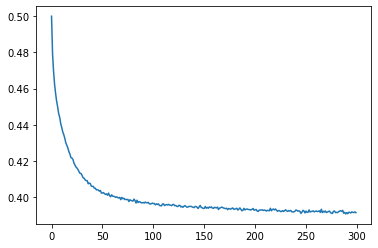

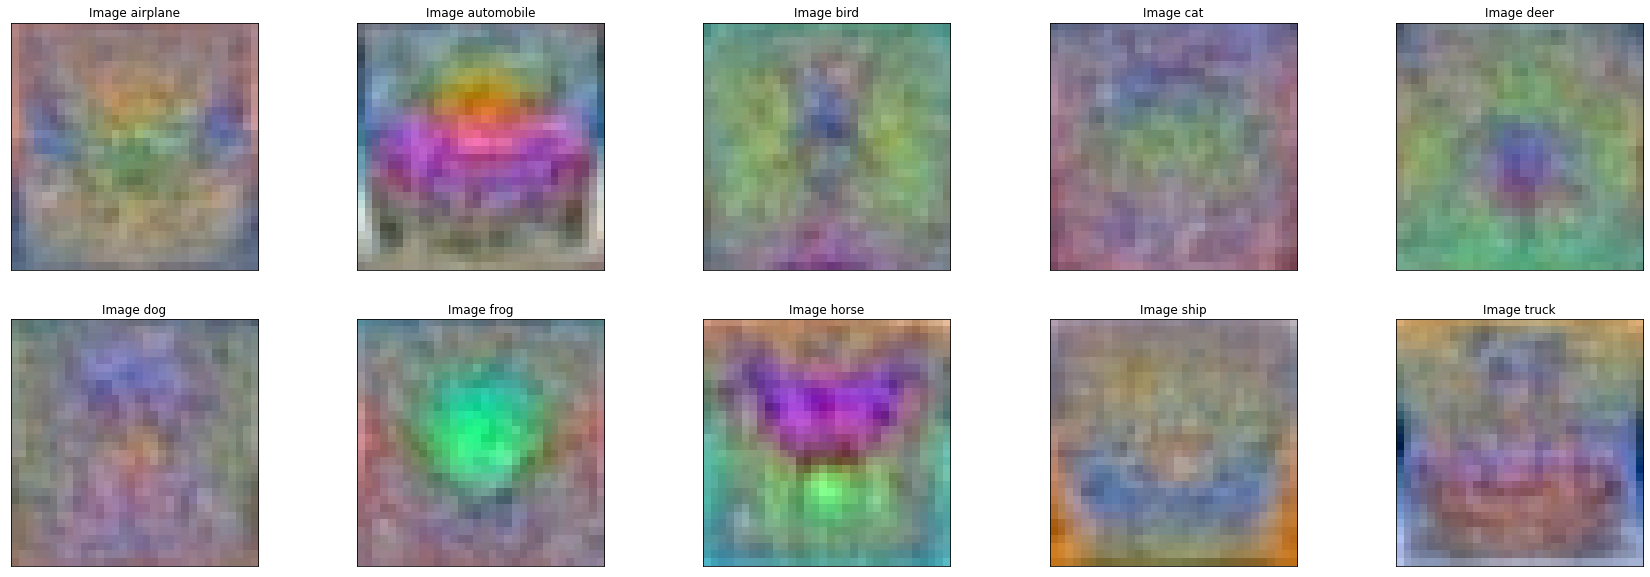

xtrain (50000, 3072)
train accuracy =  0.78006
xtest (10000, 3072)
test accuracy =  0.77411


In [12]:
plt.plot(loss_history)
w1 =  w1- np.min(w1)
img = ((w1/np.max(w1))*255).astype('uint8')
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(30,10))
cla_s= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
p = 1 
for i in range(K):
    imgc = img[:,i].reshape(32,32,3)
    plt.subplot(2,5,p),plt.imshow(imgc[:,:,::-1])
    plt.title("Image "+ cla_s[i]),
    plt.xticks([])
    plt.yticks([])      
    p=p+1

plt.show()

x_t = x_train
print("xtrain", x_t.shape)
y_pred = x_t.dot(w1) + b1

x_t = x_test
print("xtest", x_t.shape)
y_pred= x_t.dot(w1) + b1

tr_ac = 1.0 -1/(10*Ntr)*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred, axis=1))).sum()
print("train accuracy = ", tr_ac)

te_ac = 1.0 - 1/(10*Nte)*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred, axis=1))).sum()
print("test accuracy = ", te_ac)